# Занятие 9. Аппроксимация в Python

## Содержание

- [Полиномы](#Полиномы)
- [Апроксимация полиномом](#Апроксимация-полиномом)
    - [Задача 1](#Задача-1)
- [Аппроксимация функцией](#Аппроксимация-функцией)
- [Аппроксимация КДО](#Аппроксимация-КДО)
    - [Аппроксимация КДО функцией Гаусса](#Аппроксимация-КДО-функцией-Гаусса)
    - [Аппроксимация КДО функцией Лоренца](#Аппроксимация-КДО-функцией-Лоренца)
    - [Задача 2](#Задача-2)


Необходимые файлы:
- scan13555.txt
- b2eed6.gif
- 600px-Cauchy_pdf.svg.png

## Полиномы

Полином задается вектором из его коэффициентов, начиная с коэффициента при старшей степени. Например для определения полинома

$P = x^7 + 1.7 x^5 - 4x^3 + x^2 - 0.1x +4$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

P = [1, 0, 1.7, 0, -4, 1, -0.1, 4]

# Вычислим значение полинома в точке 1:
np.polyval(P, 1)

3.6

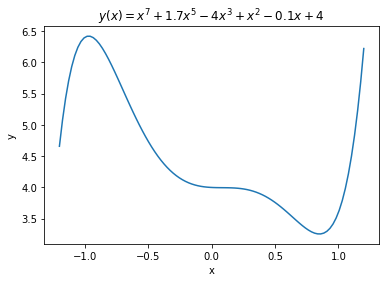

In [2]:
# Вычислим значение полинома на диапазоне значений:

x = np.linspace(-1.2, 1.2, 100)
y = np.polyval(P, x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$y(x) = x^7 + 1.7 x^5 - 4x^3 + x^2 - 0.1x +4$")
plt.show()

## Аппроксимация полиномом

При аппроксимации табличные данные моделируют кривой, которая не обязана проходить через все узловые точки, а должна как бы сгладить все случайные помехи табличной функции. Один из самых популярных методов аппроксимации – это метод наименьших квадратов (МНК). В этом методе аппроксимирующую кривую проводят так, чтобы её отклонения от табличных данных по всем узловым точкам были минимальными.

Создадим модель датасета на основе синуса. Это будут данные, которые мы будем пробовать апроксимировать полиномами.

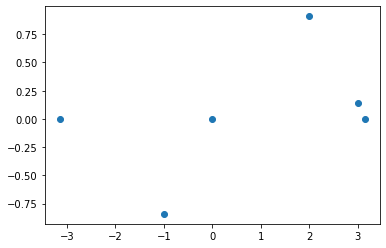

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Моделируем экспериментальные данные синусом
x = [-np.pi, -1, 0, 2, 3, np.pi]
y = np.sin(x)

plt.plot(x, y, "o")
plt.show()

Чтобы найти коэффициенты апроксимирующего полинома, используем функцию **np.polifit**, которая принимает в качестве аргументов данные в виде векторов x и y, и степень полинома. Результатом работы функции является вектор-строка длиной n+1, содержащая коэффициенты полинома в порядке уменьшения степеней.  Степень полинома не может быть больше числа точек в датасете. 

Для примера выполним аппроксимацию полиномом первой степени.

 
0.09475 x - 0.02834


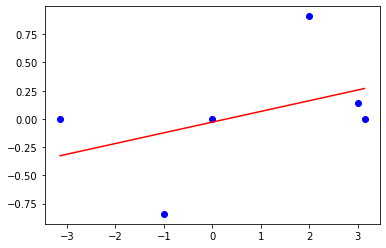

In [7]:
# Находим коэффициенты аппроксимирующего полинома
P = np.polyfit(x, y, 1)

# Записываем аппроксимирующую функцию
f = np.poly1d(P)
print(f)

plt.plot(x, y, "bo")

# Вычисляем аппроксимирующую функцию на множестве значений
x_new = np.linspace(-np.pi, np.pi, 100)
plt.plot(x_new, f(x_new), "r")
plt.show()

## Задача 1

Выполните аппроксимацию табличных данных: 

x = [0, 0.1 , 0.2, 0.3, 0.5];

y = [3, 4.5, 1.7, 0.7, -1].

• Применяя метод наименьших квадратов, многочленами 1-й, 2-й, 3-й и 4-й степени.

• Постройте на одном графике экспериментальные точки и кривые всех рассчитанных апроксимирующих многочленов.

• На графике подпишите оси и создайте легенду

## Аппроксимация функцией

Полезный блог:

http://emilygraceripka.com/blog/14

http://emilygraceripka.com/blog/16

Сначала импортируем соответствующие модули Python, которые будут использоваться:

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Теперь рассмотрим набор x, y - данных. Эти данные имеют одну независимую переменную (значения x) и одну зависимую переменную (значения y). Преобразуем данные в массивы numpy, чтобы использовать возможности numpy при оценке данных. Часто бывает очень полезно взглянуть на график данных, когда решается, какая функция лучше подходит для аппроксимации.

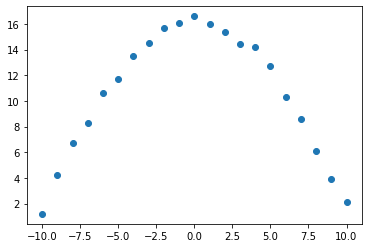

In [15]:
# X = [19.362, 19.376, 19.38, 19.387, 19.389, 19.394, 19.395, 19.397, 19.406, 19.414, 19.422]
# Y = [2267, 2371, 2419, 3618, 3860, 3023, 2873, 2575, 2415, 2325, 2274]

X = [
    -10.0,
    -9.0,
    -8.0,
    -7.0,
    -6.0,
    -5.0,
    -4.0,
    -3.0,
    -2.0,
    -1.0,
    0.0,
    1.0,
    2.0,
    3.0,
    4.0,
    5.0,
    6.0,
    7.0,
    8.0,
    9.0,
    10.0,
]
Y = [
    1.2,
    4.2,
    6.7,
    8.3,
    10.6,
    11.7,
    13.5,
    14.5,
    15.7,
    16.1,
    16.6,
    16.0,
    15.4,
    14.4,
    14.2,
    12.7,
    10.3,
    8.6,
    6.1,
    3.9,
    2.1,
]

xdata = np.array(X)
ydata = np.array(Y)

plt.plot(xdata, ydata, "o")
plt.show()

Такая кривая достаточно хорошо описывается нормальным распределением или функцией Гаусса:

$y = A e^{-Bx^2}$

Наша цель — найти значения A и B, которые лучше всего соответствуют данным. Во-первых, нужно написать функцию на Python для функции Гаусса. Функция должна принимать в качестве входных данных независимую переменную (значения x) и все подходящие параметры.

In [16]:
# Define the Gaussian function
def Gauss(x, A, B):
    y = A * np.exp(-1 * B * x ** 2)
    return y

Чтобы аппроксимировать данные, будем использовать функцию **curve_fit** из модуля Python **scipy.optimize**. Он использует нелинейный метод наименьших квадратов. Больше информации о curve_fit в онлайн документации: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html.

Функция **curve_fit** принимает три обязательных параметра: 

- аппроксимирующая функция;

- данные x и y.

Необязательные параметры:

- **p0** — массив стартовых параметров функции для фитирования;

- **bounds** — ограничения на параметры для фитирования (-∞ to ∞).

На выходе у **curve_fit**:

- массив оптимальных значений параметров аппроксимирующей функции;

- матрица предполагаемой ковариации параметров, из которой можно вычислить стандартную ошибку для параметров.

In [17]:
parameters, covariance = curve_fit(Gauss, xdata, ydata)
parameters

/var/folders/mw/ghg5tdk92fb16x1cw0x26m400000gp/T/ipykernel_1150/3526111182.py:3: RuntimeWarning: overflow encountered in exp
  y = A * np.exp(-1 * B * x ** 2)


array([1.69342863e+01, 1.57396009e-02])

Это предупреждение можно игнорировать. Подробное описание по ссылке: https://www.statology.org/runtimewarning-overflow-encountered-in-exp/

Вычисленные оптимальные значения A и B теперь сохраняются спискe parameters.

In [18]:
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

16.934286340519687
0.015739600927241554


Теперь мы хотим увидеть, насколько хорошо вычисленная аппроксимирующая кривая соответствует данным. Для этого вычислим значения y, используя функцию с параметрами A и B, а затем построим график для сравнения этих рассчитанных значений с данными.

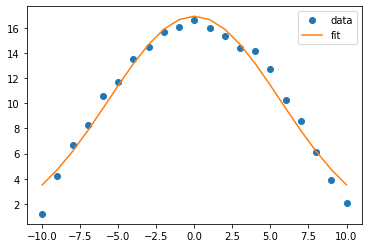

In [20]:
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, "o", label="data")
plt.plot(xdata, fit_y, "-", label="fit")
plt.legend()
plt.show()

Больше примеров аппроксимации с помощью curve_fit:
    
https://education.molssi.org/python-data-analysis/03-data-fitting/index.html 
    
http://emilygraceripka.com/blog/14        

## Аппроксимация КДО

Из всего многообразия библиотеки **scipy**, для аппроксимации кривых дифракционного отражения мы будем пользоваться только функцией **curve_fit**, поэтому для краткости записи можем импортировать её одну.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

Загружаем данные из уже знакомого датасета:

In [22]:
cols = "Pt_No  omega  eh_c01  eh_t01  sl_mon_b_vol  sl_mon_t_vol \
lmbd_countsroi1  lmbd_countsroi1_atten  lmbd_countsroi2  lmbd_countsroi2_atten  \
lmbd_countsroi3  lmbd_countsroi3_atten  dt".split()

data = pd.read_csv("scan13555.txt", sep=" ", skiprows=28, names=cols)
data.head(4)

,Pt_No,omega,eh_c01,eh_t01,sl_mon_b_vol,sl_mon_t_vol,lmbd_countsroi1,lmbd_countsroi1_atten,lmbd_countsroi2,lmbd_countsroi2_atten,lmbd_countsroi3,lmbd_countsroi3_atten,dt
0,0,14.903406,7314.0,0.5,0.032109,0.031172,1474.0,1474.0,5742.0,5742.0,240.0,240.0,0.534496
1,1,14.904444,7310.0,0.5,0.034141,0.032266,1719.0,1719.0,6008.0,6008.0,207.0,207.0,1.129613
2,2,14.905534,7352.0,0.5,0.032266,0.033438,2151.0,2151.0,6719.0,6719.0,192.0,192.0,1.669109
3,3,14.906531,7155.0,0.5,0.034609,0.034453,2766.0,2766.0,7675.0,7675.0,207.0,207.0,2.244905


Перед аппроксимацией всегда стоит сперва посмотреть на что похожи данные, заодно преобразуем их в np.array для удобства рассчетов:

[14.90340625 14.90444375 14.90553438 14.90653125 14.90773125 14.90894063
 14.9100625  14.9111625  14.91234688 14.91354688 14.9146625  14.91576563
 14.91686563 14.9179625  14.91908438 14.920125   14.92123125 14.92223125
 14.92345625 14.92485    14.92604688 14.92725313 14.92836875 14.92946875
 14.93065625 14.93176563 14.93288125 14.934075   14.93518125 14.93636875
 14.93745938 14.9386625  14.9396625  14.94076875 14.941875   14.94289063]
14.942890625000013


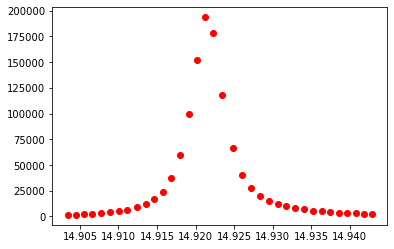

In [23]:
x = np.array(data["omega"])
print(x)
y = np.array(data["lmbd_countsroi1"])
print(x[-1])

plt.plot(x, y, "ro")

### Аппроксимация КДО функцией Гаусса

/Users/ksurrr/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


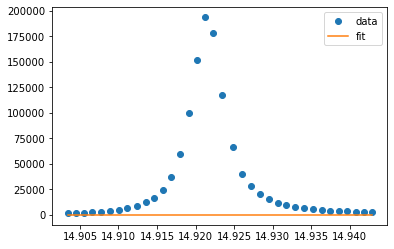

In [24]:
# Define the Gaussian function
def Gauss(x, A, B):
    y = A * np.exp(-1 * B * x ** 2)
    return y


parameters, covariance = curve_fit(Gauss, x, y)

fit_A = parameters[0]
fit_B = parameters[1]

fit_y = Gauss(x, fit_A, fit_B)
plt.plot(x, y, "o", label="data")
plt.plot(x, fit_y, "-", label="fit")
plt.legend()

Видим, что в данном случае параметры по умолчанию не дают приемлимого результата, нужно аккуратней расписать вид нормального распределения и добавить в **curve_fit** необязательные аргументы.

$f(x) = \frac{1}{ \sigma \sqrt{2 \pi}} e^{ \frac{1}{2} (\frac{x - \mu}{\sigma})^2} $

- $\frac{1}{ \sigma \sqrt{2 \pi}}$ - амплитуда;

- $\sigma$ - стандартное отклонение;

- $\mu$ - среднее значение.

<img src ='b2eed6.gif'>

In [25]:
# Функция для вычисления гауссианы по парметрам amp, mean, и sigma
def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-np.power(x - mean, 2) / (2 * np.power(sigma, 2)))


# приближенная оценка amp, mean, standard deviation
amp = max(y)
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))

print("amp =", amp)
print("mu =", mean)
print("sigma =", sigma)

amp = 193539.0
mu = 14.921852912825681
sigma = 0.004909870308001063


### Функция curve_fit

Для аппроксимации используем функцию **curve_fit**.

Принимает аргументы:

- **f** — аппроксимирующая функция;

- **xdata** — вектор данных по х;

- **ydata** — вектор данных по у;

- **p0** — массив стартовых параметров для фитирования;

- **bounds** — ограничения на параметры для фитирования (-∞ to ∞).

Возвращает:

- **pars** — массив оптимизированных параметров;

- **cov** — матрица ковариаций, которую можно использовать для определения стандартных отклонений подгоночных параметров.

In [26]:
# Аппроксимируем наши данные гауссианой
pars, cov = curve_fit(
    f=gaussian, xdata=x, ydata=y, p0=[amp, mean, sigma], bounds=(-np.inf, np.inf)
)
pars

array([1.79430559e+05, 1.49215138e+01, 2.49942796e-03])

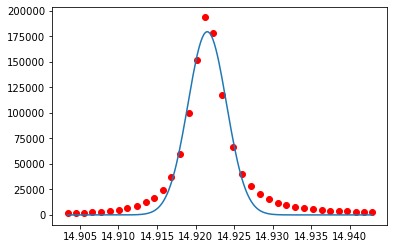

In [28]:
# Создаем массив на котором будем вычислять аппроксимирующую функцию
x_new = np.linspace(x[0], x[-1], 200)

plt.plot(x, y, "ro")
# Запись *pars распаковывает массив, записывая его элементы через запятую
plt.plot(x_new, gaussian(x_new, *pars))
plt.show()

### Аппроксимация КДО функцией Лоренца

Распределение Лоренца или Коши-Лоренца лучше подходит для аппроксимации кривых дифракционного отражения. Оно записывается как:

$ f(x, x_0, \gamma) = \frac{1}{\pi \gamma} \frac{\gamma^2}{(x - x_0)^2 + \gamma^2}$,

- $x_0$ - центр кривой,

- $\gamma$ - полуширина кривой.

<img src = '600px-Cauchy_pdf.svg.png' width = 300>

## Задача 2

Аппроксимируйте кривую дифракционного отражения из scan13555.dat с помощью распределения Лоренца. Оценку амплитуды, положения центра кривой и полуширины кривой можно взять из нормального распределения для тех же данных.

In [29]:
# Функция для вычисления Лоренца по параметрам amp, mean, и sigma
def Lorentzian(x, amp, cen, wid):
    return amp * wid ** 2 / ((x - cen) ** 2 + wid ** 2)